In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import datetime
import warnings
warnings.filterwarnings("ignore")
#importing all relevant packages and libraries.

## Reading the CSV files

In [2]:
wages = pd.read_csv("Average_Weekly_Earnings_Quarterly.csv")
gdp = pd.read_csv("GDP_Quarterly.csv")
home_prices = pd.read_csv("Home_Price_Index.csv")
inflation = pd.read_csv("Inflation_Rates_Yearly.csv")
mortgages = pd.read_csv("Mortgage_Rates_Weekly.csv")
permits = pd.read_csv("Permits_Granted_Monthly.csv")
population = pd.read_csv("Population_Quarterly.csv")
unemployment = pd.read_csv("Unemployment_Quarterly.csv")
#reading all the csv files into variables.

## Preparing the Data
### Reading data from the csv files, cleaning them and formatting them.

In [3]:
home_prices['DATE'] = home_prices['DATE'].astype('datetime64[ns]')
#converting the DATE column from object type to datetime.

home_prices['MONTH'] = home_prices['DATE'].dt.month
#adding a new column MONTH which stores the month number.

home_prices['DATE'] = home_prices['DATE'].dt.year
#replacing the date info in DATE to year number.

home_prices = home_prices.rename(columns={"DATE": "YEAR"})
#renaming the DATE column to YEAR column.

home_prices = home_prices[home_prices.MONTH.isin([1, 4, 7, 10])]
#traversing through the MONTH column and keeping rows of quarterly data.

home_prices.reset_index(drop=True, inplace=True)
#resetting the index.

home_prices.loc[home_prices['MONTH'].isin([1,2,3]), 'MONTH'] = "Q1"
home_prices.loc[home_prices['MONTH'].isin([4,5,6]), 'MONTH'] = "Q2"
home_prices.loc[home_prices['MONTH'].isin([7,8,9]), 'MONTH'] = "Q3"
home_prices.loc[home_prices['MONTH'].isin([10,11,12]), 'MONTH'] = "Q4"
#converting the MONTH data from month number to quarter number.

home_prices = home_prices.set_index(['YEAR', 'MONTH'])
#setting the index of the formatted dataset to YEAR and MONTH.

## Similarly, we prepare all the other feature data accordingly.

In [4]:
wages = wages.rename(columns={"LES1252881600Q": "WAGES"})
wages['DATE'] = wages['DATE'].astype('datetime64[ns]')
wages['MONTH'] = wages['DATE'].dt.month
wages['DATE'] = wages['DATE'].dt.year
wages = wages.rename(columns={"DATE": "YEAR"})

wages.loc[wages['MONTH'].isin([1,2,3]), 'MONTH'] = "Q1"
wages.loc[wages['MONTH'].isin([4,5,6]), 'MONTH'] = "Q2"
wages.loc[wages['MONTH'].isin([7,8,9]), 'MONTH'] = "Q3"
wages.loc[wages['MONTH'].isin([10,11,12]), 'MONTH'] = "Q4"

wages = wages.set_index(['YEAR', 'MONTH'])

In [5]:
gdp['DATE'] = gdp['DATE'].astype('datetime64[ns]')
gdp['MONTH'] = gdp['DATE'].dt.month
gdp['DATE'] = gdp['DATE'].dt.year
gdp = gdp.rename(columns={"DATE": "YEAR"})

gdp.loc[gdp['MONTH'].isin([1,2,3]), 'MONTH'] = "Q1"
gdp.loc[gdp['MONTH'].isin([4,5,6]), 'MONTH'] = "Q2"
gdp.loc[gdp['MONTH'].isin([7,8,9]), 'MONTH'] = "Q3"
gdp.loc[gdp['MONTH'].isin([10,11,12]), 'MONTH'] = "Q4"

gdp = gdp.set_index(['YEAR', 'MONTH'])

In [6]:
mortgages['DATE'] = mortgages['DATE'].astype('datetime64[ns]')
mortgages = mortgages.rename(columns={"MORTGAGE30US": "MORTGAGE"})
mortgages['MONTH'] = mortgages['DATE'].dt.month
mortgages['DATE'] = mortgages['DATE'].dt.year
mortgages = mortgages.rename(columns={"DATE": "YEAR"})
mortgages = mortgages.groupby(['MONTH', 'YEAR'], as_index=False)['MORTGAGE'].mean().sort_values(by=['YEAR', 'MONTH'])
#converting the weekly data into the mean of the weeks i.e. monthly data.
#grouping the rows by MONTH and YEAR and combining them into one storing the mean mortgages.

mortgages.loc[mortgages['MONTH'].isin([1,2,3]), 'MONTH'] = "Q1"
mortgages.loc[mortgages['MONTH'].isin([4,5,6]), 'MONTH'] = "Q2"
mortgages.loc[mortgages['MONTH'].isin([7,8,9]), 'MONTH'] = "Q3"
mortgages.loc[mortgages['MONTH'].isin([10,11,12]), 'MONTH'] = "Q4"
mortgages = mortgages.groupby(['MONTH', 'YEAR'], as_index=False)['MORTGAGE'].mean().sort_values(by=['YEAR', 'MONTH'])
#converting the monthly data into the mean of the months i.e. quarterly data.
#grouping the rows by YEAR and MONTH (which now has quarter info) and combining them into one storing the mean mortgages.

mortgages.reset_index(drop=True, inplace=True)
mortgages = mortgages.set_index(['YEAR', 'MONTH'])

In [7]:
permits['PERMIT(th)'] = permits['PERMIT(th)']*1000
permits = permits.rename(columns={"PERMIT(th)":"PERMITS"})
permits['DATE'] = permits['DATE'].astype('datetime64[ns]')
permits['MONTH'] = permits['DATE'].dt.month
permits['DATE'] = permits['DATE'].dt.year
permits = permits.rename(columns={"DATE": "YEAR"})

permits.loc[permits['MONTH'].isin([1,2,3]), 'MONTH'] = "Q1"
permits.loc[permits['MONTH'].isin([4,5,6]), 'MONTH'] = "Q2"
permits.loc[permits['MONTH'].isin([7,8,9]), 'MONTH'] = "Q3"
permits.loc[permits['MONTH'].isin([10,11,12]), 'MONTH'] = "Q4"
permits = permits.groupby(['MONTH', 'YEAR'], as_index=False)['PERMITS'].sum().sort_values(by=['YEAR', "MONTH"])
#converting the monthly data into the mean of the months i.e. quarterly data.
#grouping the rows by YEAR and MONTH (which now has quarter info) and combining them into one storing the total quarterly permits.

permits.reset_index(drop=True, inplace=True)
permits = permits.set_index(['YEAR', 'MONTH'])

In [8]:
population = population.rename(columns={"B230RC0Q173SBEA": "POPULATION"})
population['POPULATION'] = population['POPULATION']*1000
population['DATE'] = population['DATE'].astype('datetime64[ns]')
population['MONTH'] = population['DATE'].dt.month
population['DATE'] = population['DATE'].dt.year
population = population.rename(columns={"DATE": "YEAR"})

population.loc[population['MONTH'].isin([1,2,3]), 'MONTH'] = "Q1"
population.loc[population['MONTH'].isin([4,5,6]), 'MONTH'] = "Q2"
population.loc[population['MONTH'].isin([7,8,9]), 'MONTH'] = "Q3"
population.loc[population['MONTH'].isin([10,11,12]), 'MONTH'] = "Q4"

population = population.set_index(['YEAR', 'MONTH'])

In [9]:
unemployment['YEAR'] = unemployment['YEAR'].astype('datetime64[ns]')
unemployment['MONTH'] = unemployment['YEAR'].dt.month
unemployment['YEAR'] = unemployment['YEAR'].dt.year

unemployment.loc[unemployment['MONTH'].isin([1,2,3]), 'MONTH'] = "Q1"
unemployment.loc[unemployment['MONTH'].isin([4,5,6]), 'MONTH'] = "Q2"
unemployment.loc[unemployment['MONTH'].isin([7,8,9]), 'MONTH'] = "Q3"
unemployment.loc[unemployment['MONTH'].isin([10,11,12]), 'MONTH'] = "Q4"

unemployment = unemployment.set_index(['YEAR', 'MONTH'])

In [10]:
inflation = inflation.rename(columns={"Inflation Rate (%)": "INF", "Year": "YEAR"})
inflation['INF'] = inflation['INF'].str[:-1]
#removing the '%' character from the column.

inflation['INF'] = inflation['INF'].astype('float64')
inflation.sort_values(by=['YEAR'], ascending=True, inplace=True)
#converting the INF column from object type to float and sorting the column in ascending order.

inflation = inflation.append([inflation]*3, ignore_index=True).sort_values(by=['YEAR'])
quarters = ["Q1", "Q2", "Q3", "Q4"]*(int(inflation.shape[0]/4))
inflation['MONTH'] = quarters
#replicating the number of rows in order to create quarterly data from yearly data.

inflation = inflation.set_index(['YEAR', 'MONTH'])

## Combining the Data in one DataFrame

In [11]:
home_prices = home_prices.join([inflation, gdp, unemployment, permits, population, mortgages, wages])
#joining all the dataframes into one with respect to the YEAR and MONTH indices.

home_prices.reset_index(['MONTH'], inplace=True)
home_prices.drop(['MONTH'], axis=1, inplace=True)
#resetting the indexes and dropping the MONTH column as it is no longer required.

## From this data we will only be using the past 20 years information
### Thus, we will drop data from 1987 to 2001

In [12]:
home_prices.drop([i for i in range(1987, 2002)], inplace=True)
#as we are working only on the past 20 years data, we only need rows from 2002 to 2021.
#hence, we drop all rows ranging from the start to 2001.

home_prices.reset_index(['YEAR'], inplace=True)

In [13]:
home_prices.head()

,YEAR,INDEX,INF,GDP,NROU,PERMITS,POPULATION,MORTGAGE,WAGES
0,2002,117.143,1.59,10783.500,5.140615,5143000.0,286935000.0,6.968000,341.0
1,2002,119.611,1.59,10887.460,5.129905,5143000.0,287574000.0,6.813667,339.0
2,2002,122.886,1.59,10984.040,5.119209,5236000.0,288303000.0,6.289167,337.0
3,2002,125.733,1.59,11061.433,5.108562,5466000.0,289007000.0,6.076000,336.0
4,2003,128.460,2.27,11174.129,5.097990,5419000.0,289609000.0,5.834500,335.0


In [14]:
home_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   YEAR        79 non-null     int64  
 1   INDEX       79 non-null     float64
 2   INF         76 non-null     float64
 3   GDP         78 non-null     float64
 4   NROU        79 non-null     float64
 5   PERMITS     79 non-null     float64
 6   POPULATION  78 non-null     float64
 7   MORTGAGE    79 non-null     float64
 8   WAGES       77 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 5.7 KB


### Visualizing the relationship of the features with the target variable.

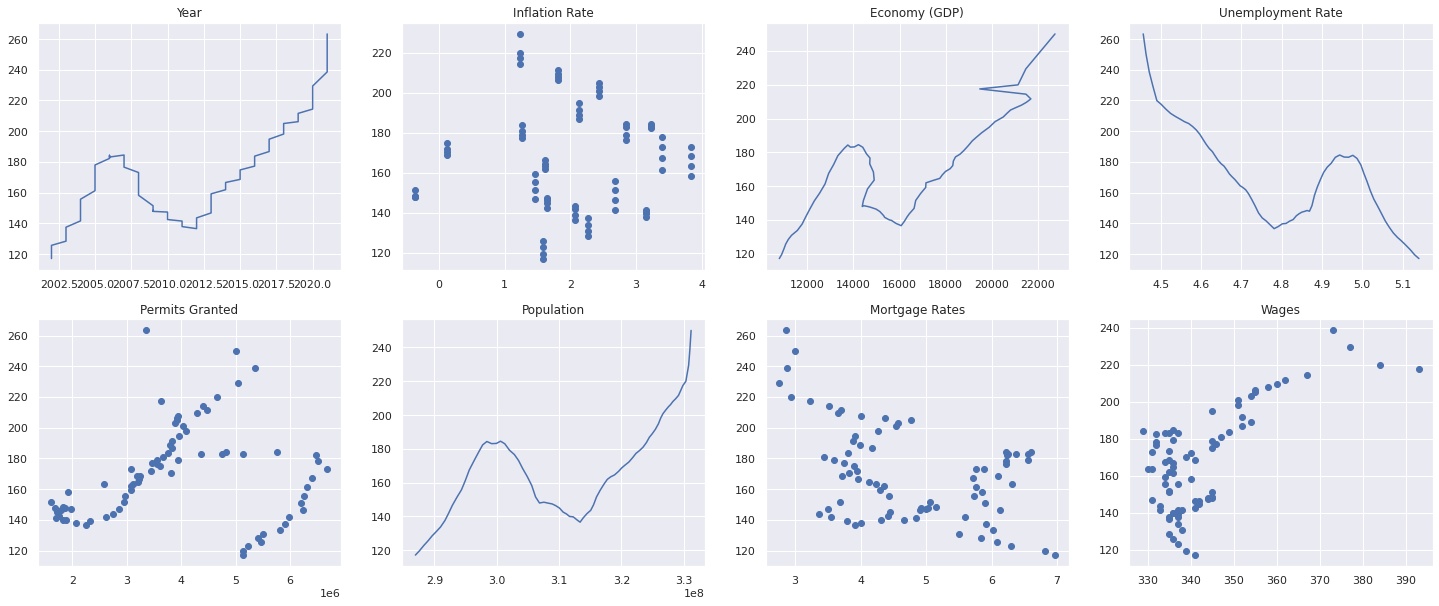

In [15]:
figure, axis = plt.subplots(2, 4, figsize=(25,10))
#plotting the relationship between the target variable and the features on a 2 x 4 grid.

axis[0, 0].plot(home_prices['YEAR'], home_prices['INDEX'])
axis[0, 0].set_title("Year")

axis[0, 1].scatter(home_prices['INF'], home_prices['INDEX'])
axis[0, 1].set_title("Inflation Rate")

axis[0, 2].plot(home_prices['GDP'], home_prices['INDEX'])
axis[0, 2].set_title("Economy (GDP)")

axis[0, 3].plot(home_prices['NROU'], home_prices['INDEX'])
axis[0, 3].set_title("Unemployment Rate")

axis[1, 0].scatter(home_prices['PERMITS'], home_prices['INDEX'])
axis[1, 0].set_title("Permits Granted")

axis[1, 1].plot(home_prices['POPULATION'], home_prices['INDEX'])
axis[1, 1].set_title("Population")

axis[1, 2].scatter(home_prices['MORTGAGE'], home_prices['INDEX'])
axis[1, 2].set_title("Mortgage Rates")

axis[1, 3].scatter(home_prices['WAGES'], home_prices['INDEX'])
axis[1, 3].set_title("Wages")

plt.show()

### Visualizing the distribution of data within the features.

Text(0.5, 1.0, 'Wages')

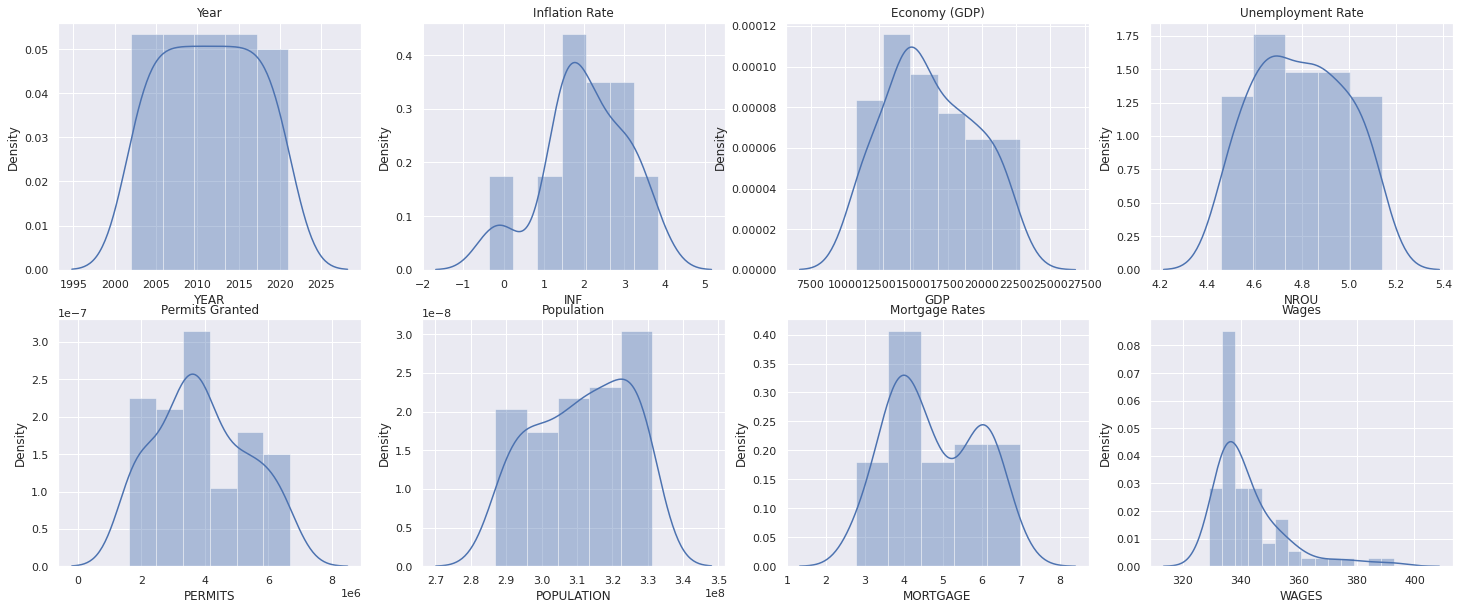

In [16]:
figure, axis = plt.subplots(2, 4, figsize=(25,10))
#plotting the distribution of the data within itself on a 2 x 4 grid.

sns.distplot(home_prices['YEAR'], ax=axis[0, 0])
axis[0, 0].set_title("Year")

sns.distplot(home_prices['INF'], ax=axis[0, 1])
axis[0, 1].set_title("Inflation Rate")

sns.distplot(home_prices['GDP'], ax=axis[0, 2])
axis[0, 2].set_title("Economy (GDP)")

sns.distplot(home_prices['NROU'], ax=axis[0, 3])
axis[0, 3].set_title("Unemployment Rate")

sns.distplot(home_prices['PERMITS'], ax=axis[1, 0])
axis[1, 0].set_title("Permits Granted")

sns.distplot(home_prices['POPULATION'], ax=axis[1, 1])
axis[1, 1].set_title("Population")

sns.distplot(home_prices['MORTGAGE'], ax=axis[1, 2])
axis[1, 2].set_title("Mortgage Rates")

sns.distplot(home_prices['WAGES'], ax=axis[1, 3])
axis[1, 3].set_title("Wages")

### Exploring the correlations between the features and the summary of the features by plotting a heatmap.

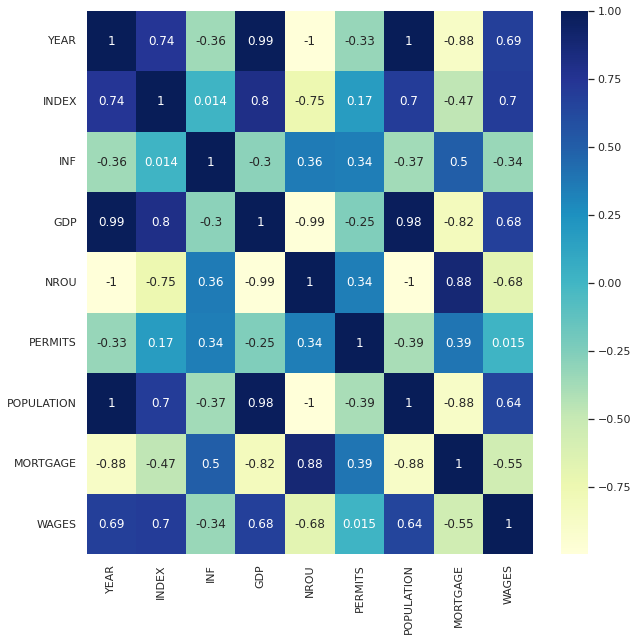

In [17]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(home_prices.corr(), cmap="YlGnBu", annot=True)
#plotting a heatmap to understand the correlations among the variables.

In [18]:
home_prices.describe()
#summarizing the features by column in order to obtain information on missing values, mean, etc.

,YEAR,INDEX,INF,GDP,NROU,PERMITS,POPULATION,MORTGAGE,WAGES
count,79.000000,79.000000,76.000000,78.000000,79.000000,7.900000e+01,7.800000e+01,79.000000,77.000000
mean,2011.379747,169.898443,2.022632,16248.475821,4.793269,3.899013e+06,3.113654e+08,4.764859,342.753247
std,5.738542,30.751351,1.049545,3245.951544,0.193198,1.440629e+06,1.341200e+07,1.143299,12.360970
min,2002.000000,117.143000,-0.360000,10783.500000,4.456865,1.616000e+06,2.869350e+08,2.761000,329.000000
25%,2006.500000,146.495000,1.460000,14083.582750,4.639382,2.961000e+06,3.001118e+08,3.857833,335.000000
50%,2011.000000,167.502000,2.070000,15744.974000,4.791622,3.817000e+06,3.125900e+08,4.445833,338.000000
75%,2016.000000,184.423500,2.850000,18734.498500,4.949544,5.094500e+06,3.233225e+08,5.869833,345.000000
max,2021.000000,263.305000,3.840000,22740.959000,5.140615,6.685000e+06,3.312090e+08,6.968000,393.000000


## Handling Missing Data
### Replacing NaN values with the immediate previous valid value.

In [19]:
home_prices = home_prices.fillna(method='ffill')
#as the mean of the data varies a lot from the range of the missing values, we replace it with the immediate previous values.
#for this we use the 'ffill' method i.e. the forward fill method, which fill the forward missing cells with the current data.

## Splitting the Data
### We split the data into training (80%) and testing data (20%)

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(home_prices, home_prices['INDEX'], test_size=0.2, random_state=1)
#we split the dataset 80:20 with respect to a defined random state 

In [21]:
x_train.shape, x_test.shape

((63, 9), (16, 9))

## Feature Scaling
### Many features are measured in different units. Hence, we apply feature scaling to bring them to the same scale

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#we use the StandardScaler method to bring all variables to a single scale.
#all variables will be scaled to 0 mean and unit variance.

In [23]:
feature_scale = [feature for feature in home_prices.columns if feature not in ['INDEX']]
scaler.fit(home_prices[feature_scale])
#scaling all the features except the target.

StandardScaler()

### We transform the training and testing data and add the target variable.

In [24]:
x_train = pd.DataFrame(scaler.transform(x_train[feature_scale]), columns=feature_scale)
x_test = pd.DataFrame(scaler.transform(x_test[feature_scale]), columns=feature_scale)
#transforming the training and testing datasets in order to apply on the model.

x_train.shape, x_test.shape

((63, 8), (16, 8))

In [25]:
x_train

,YEAR,INF,GDP,NROU,PERMITS,POPULATION,MORTGAGE,WAGES
0,-0.066598,1.129309,-0.207859,0.043240,-1.411833,0.050379,-0.403030,-0.577417
1,-1.644962,-0.389375,-1.627205,1.697858,0.933988,-1.736495,1.341773,-0.500623
2,-0.241971,-0.341009,-0.310791,0.184787,-1.501251,-0.070137,-0.309724,-0.193445
3,-0.241971,-0.341009,-0.411005,0.263933,-1.467020,-0.160635,0.125707,-0.116650
4,0.284150,-0.515125,0.112270,-0.307868,-0.658068,0.327981,-0.951720,-0.654212
...,...,...,...,...,...,...,...,...
58,-1.469588,0.268399,-1.527159,1.532813,1.127494,-1.591251,0.654884,-0.423828
59,-1.294214,0.664998,-1.283670,1.323966,1.635360,-1.395954,1.200933,-0.193445
60,1.511766,-0.737608,1.567580,-1.460599,0.356964,1.334187,-1.101949,1.803214
61,-1.118840,1.351791,-1.084487,1.181463,1.687753,-1.240878,0.871719,-0.577417


## Lasso Regression Model
### We will be applying Lasso Regression on the training set. We will choose a suitable alpha value (penalty)

In [26]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
#importing Lasso and GridSearchCV for implementing the model and finding the best parameters.

In [27]:
model = Lasso()
#creating an object of Lasso()

parameters = {'alpha': [1e-3, 0.001, 0.005, 1e-1, 1, 2, 5]}
#defining a set of parameters for GridSearchCV to work on.

lasso_regressor = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=5)
#GridSearchCV uses the scoring metric as negative mse, cv = 5 refers to the cross validation splitting.
#it works on the provided parameters to find the best one.

lasso_regressor.fit(x_train, y_train)
#fitting the training dataset to the model.

lasso_regressor.best_params_, lasso_regressor.best_score_

({'alpha': 0.001}, -114.9635164567541)

In [28]:
y_predicted = lasso_regressor.predict(x_test)
#predicting the testing dataset on the model.

In [29]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predicted)
#r2 score measures the coefficient of determination. It measures how good a model is on a scale of -1 to 1.

0.8808752513716731

<AxesSubplot:xlabel='INDEX', ylabel='Density'>

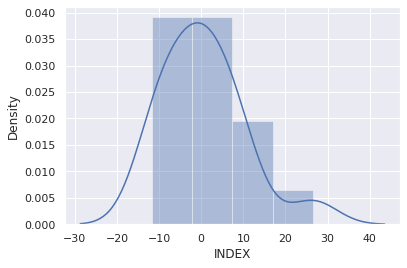

In [30]:
sns.distplot(y_test - y_predicted)
#plotting the distribution of the difference between actual and predicted values